In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
import glob
import matplotlib.image as img
from PIL import Image
from sklearn.decomposition import PCA
%matplotlib inline

# Punto 1

In [2]:
def download_files():
    #Metodo que descarga los archivos de imagenes sino existen
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

In [4]:
d_name = 'C:\\Users\\Federico\\U-semestre 2-23\\Estadistica\\tarea1\\statistic2\\Tarea2\\data\\faces\\rawdata'
X = []

for nfile in os.listdir(d_name):
    bytes_read = open(os.path.join(d_name, nfile), "rb").read()
    img_data = Image.frombytes('L', (128, 128), bytes_read)
    X.append(np.array(img_data).flatten())

X = np.array(X)

In [5]:
X.shape

(3993, 16384)

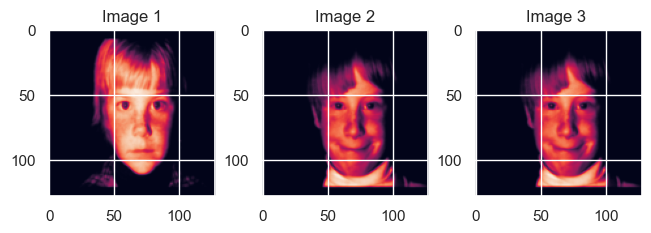

In [6]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_3_images(X,1, 2 , 3)

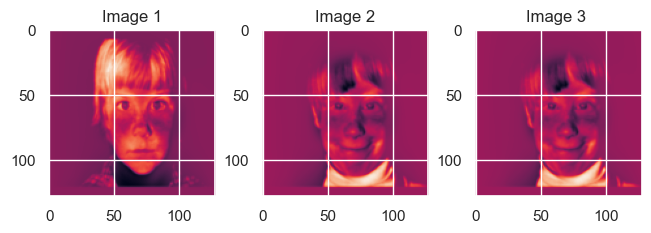

In [28]:
#Centramos las imagenes
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_3_images(X_center,1, 2 ,3)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

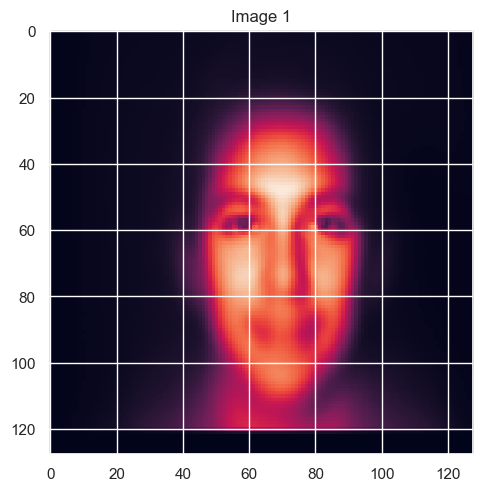

In [8]:
plot_1_images(X_mean)

In [29]:
pca = PCA(n_components=200)
# images x dim
X_reduced = pca.fit_transform(X_center)

In [10]:
#Calculamos los eigen values
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

In [11]:
eigen_values

array([7.32420891e+06, 2.15718453e+06, 1.85813876e+06, 9.75416680e+05,
       8.90129813e+05, 7.89191985e+05, 6.21898507e+05, 4.19131866e+05,
       3.61422714e+05, 2.95051423e+05, 2.28587494e+05, 2.27095623e+05,
       1.94624139e+05, 1.86033651e+05, 1.70286094e+05, 1.57874095e+05,
       1.52472522e+05, 1.44768233e+05, 1.24995062e+05, 1.20067645e+05,
       1.17078293e+05, 1.11845380e+05, 1.04416679e+05, 1.01282734e+05,
       9.52964519e+04, 9.04634310e+04, 8.50867123e+04, 8.11756110e+04,
       7.71613532e+04, 7.37759042e+04, 6.95922083e+04, 6.71508889e+04,
       6.49471813e+04, 6.21272654e+04, 5.94283658e+04, 5.78440982e+04,
       5.48819168e+04, 5.44402291e+04, 5.20407659e+04, 4.99376255e+04,
       4.89796271e+04, 4.74574843e+04, 4.58922426e+04, 4.41544500e+04,
       4.29717864e+04, 4.14701614e+04, 4.09152576e+04, 4.03283111e+04,
       3.73473951e+04, 3.69807547e+04, 3.56148326e+04, 3.44818749e+04,
       3.36401596e+04, 3.33421668e+04, 3.21277065e+04, 3.05690224e+04,
      

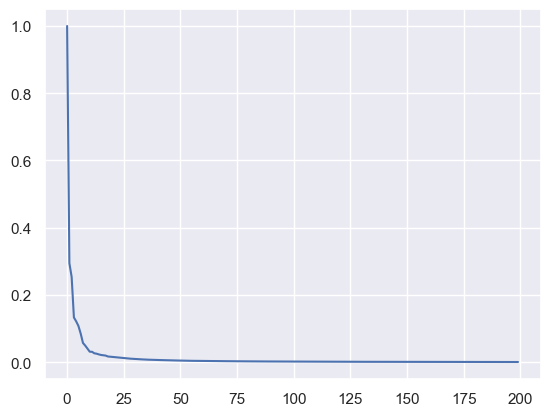

In [27]:
# Se puede ver como los primeras componentes contienen mas informacion
plt.plot(range(0,200), eigen_values/eigen_values[0])

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

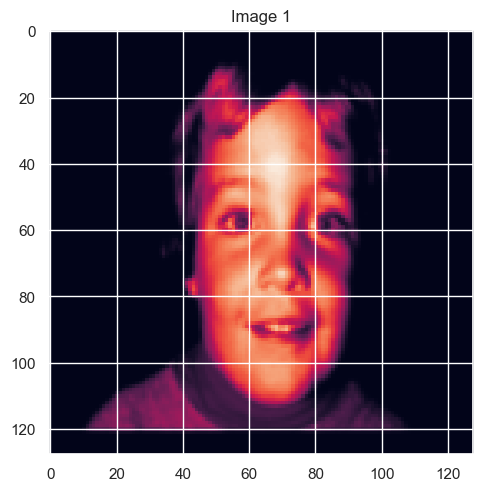

In [25]:
#Visualizamos la primer imagen
plot_1_images(X[0])

In [12]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigen_faces.shape)
face_1 = np.dot(X_reduced[0].reshape(1,-1),eigen_faces)
print(face_1.sum(axis=0))

Componentes (3993, 200)
Eigenvectores (200, 16384)
[ 5.80723190e-12 -2.36476778e-12 -5.00827681e-02 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [13]:
eigen_faces[0].shape
face_c1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
face_c1.shape

(1, 16384)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

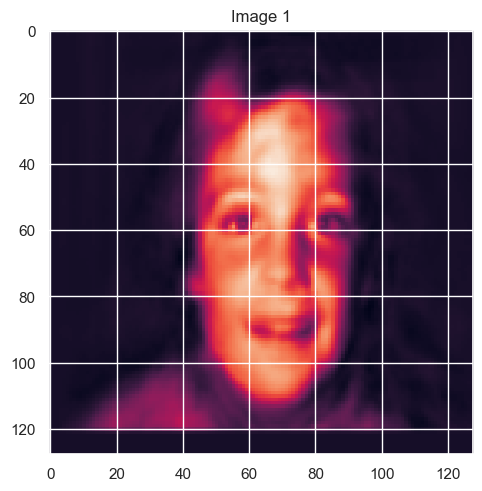

In [14]:
plot_1_images(X_mean + face_1.sum(axis=0))

(None, <Axes: title={'center': 'Con 200 eigenfaces'}>)

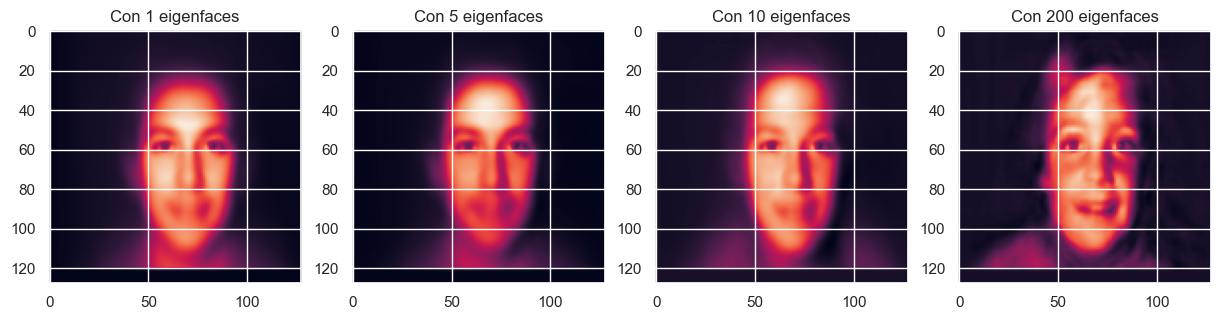

In [15]:
face_1 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:1],eigen_faces[:1,:]),axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:5],eigen_faces[:5,:]),axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:10],eigen_faces[:10,:]),axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:200],eigen_faces[:200,:]),axis=0)
fig, ax = plt.subplots(1,4,figsize=(15,15))

#Visualizamos las imagenes
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_200,ax=ax[3],label="Con 200 eigenfaces")

(None, <Axes: title={'center': 'Con 100 eigenfaces'}>)

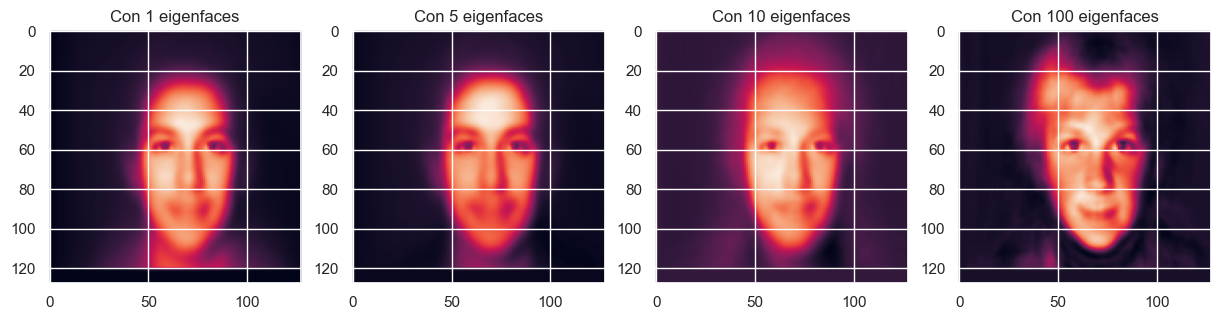

In [37]:
face_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:1],eigen_faces[:1,:]),axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],eigen_faces[:5,:]),axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],eigen_faces[:10,:]),axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:100],eigen_faces[:100,:]),axis=0)
fig, ax = plt.subplots(1,4,figsize=(15,15))

#Visualizamos las imagenes
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_200,ax=ax[3],label="Con 100 eigenfaces")

In [25]:
n_components_90 = np.where(explained_variance_ratio_cumulative >= 0.90)[0][0] + 1
n_components_95 = np.where(explained_variance_ratio_cumulative >= 0.95)[0][0] + 1

if len(np.where(explained_variance_ratio_cumulative >= 0.99)[0]) > 0:
    n_components_99 = np.where(explained_variance_ratio_cumulative >= 0.99)[0][0] + 1
else:
    n_components_99 = None

In [26]:
print("componentes que explican el 90%: ",n_components_90)
print("componentes que explican el 95%: ",n_components_95)
print("componentes que explican el 99%: ",n_components_99)
print("No se encontrarón valores que satisfacen el 99%")

componentes que explican el 90%:  75
componentes que explican el 95%:  177
componentes que explican el 99%:  None
No se encontrarón valores que satisfacen el 99%


(None, <Axes: title={'center': 'Con 300 eigenfaces'}>)

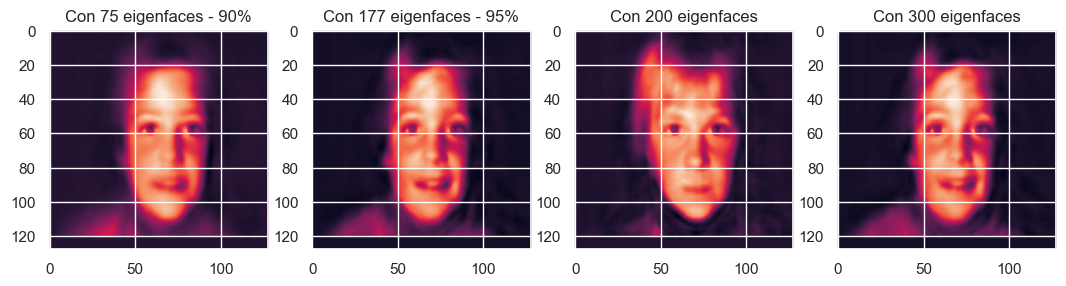

In [20]:
face_75 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:75],
                                 eigen_faces[:75,:]),
                            axis=0)
face_177 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:177],
                                      eigen_faces[:177,:]),
                               axis=0)
face_600 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:300],
                                      eigen_faces[:300,:]),
                               axis=0)

fig, ax = plt.subplots(1,4,figsize=(13,13))

plot_1_images(face_75,ax=ax[0],label="Con 75 eigenfaces - 90%")
plot_1_images(face_177,ax=ax[1],label="Con 177 eigenfaces - 95%")
plot_1_images(face_200,ax=ax[2],label="Con 200 eigenfaces")
plot_1_images(face_600,ax=ax[3],label="Con 300 eigenfaces")

# Conclusiones 

Al momento de completar con lo pedido se puede observar varias cosas:
En general las imagenes despues de aunmentar el enigenfaces de 100 no se aprecia a simple vista grandes cambios en la calidad de la imagen.

Cuando mostramos la grafica podemos confirmar esto, ya que en la grafica se ve que despues de 100 eingenfaces la linea tiende a cero lo que hace que no se generen 
grandes cambios al mostrar estas imagenes

# Punto 2

## K-mean

In [54]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [57]:
class KMeans:
    def __init__(self, number_clusters=7, max_iters=100):
        self.number_clusters = number_clusters
        self.max_iters = max_iters

    #
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.number_clusters, replace=False)]

        for iteracion in range(self.max_iters):
            distances = np.array([[absolute_distance(x, c) for c in self.centroids] for x in X])
            labels = np.argmin(distances, axis=1)

            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.number_clusters)])

            if np.all(self.centroids == new_centroids):
                print(f"Converge en la iteración {iteracion}.")
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([[absolute_distance(x, c) for c in self.centroids] for x in X])
        labels = np.argmin(distances, axis=1)
        return labels
        
def absolute_distance(point1, point2):
    return np.sum(np.abs(point1 - point2)) 

In [58]:
kmeans = KMeans(number_clusters=7)
kmeans.fit(X_pca)
predicted_labels = kmeans.predict(X_pca)

Converge en la iteración 14.


In [59]:
selected_faces = []
for cluster_id in range(7):
    cluster_indices = np.where(predicted_labels == cluster_id)[0]
    cluster_centroid = kmeans.centroids[cluster_id]

    #Formula de distancia de valor absoluto
    distances_to_centroid = [absolute_distance(X_pca[i], cluster_centroid) for i in cluster_indices]
    
    sorted_indices = np.argsort(distances_to_centroid)
    selected_faces.extend(cluster_indices[sorted_indices[:4]])

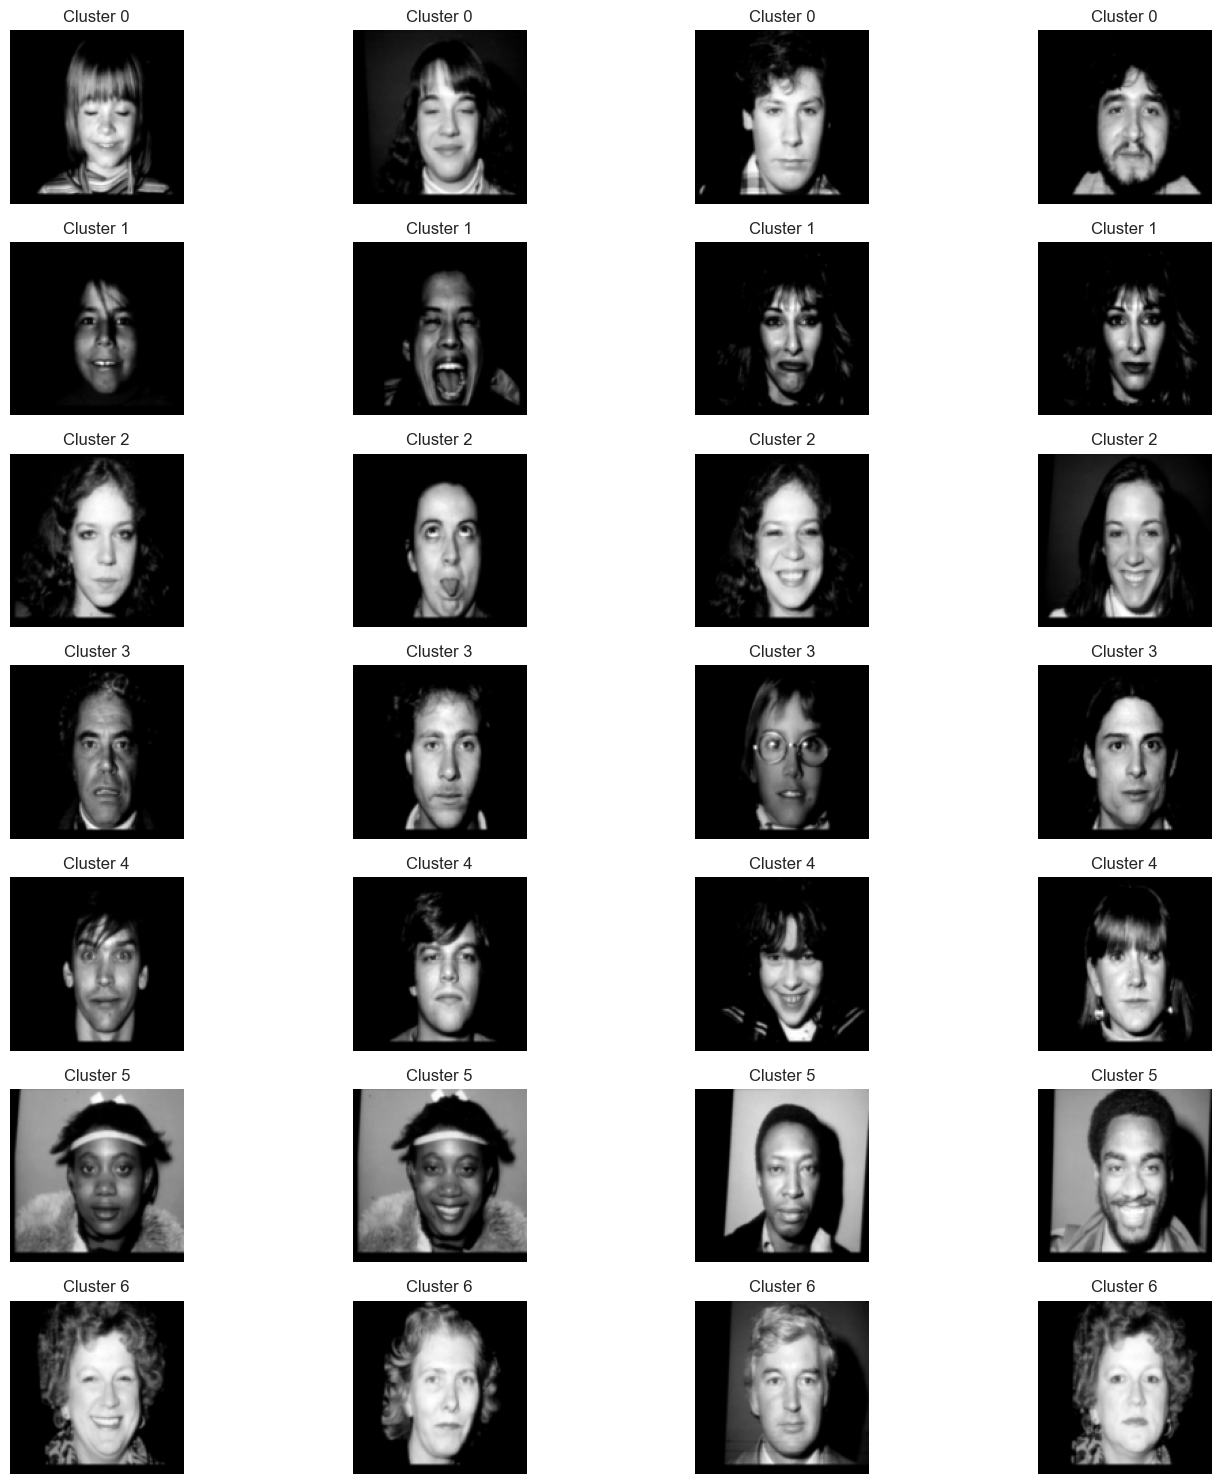

In [53]:
plt.figure(figsize=(15, 15))
for i, face_idx in enumerate(selected_faces):
    plt.subplot(7, 4, i + 1)
    plt.imshow(X[face_idx].reshape(128, 128), cmap='gray')
    plt.title(f'Cluster {predicted_labels[face_idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Conclusiones

Al momento de analizar las imagenes resultantes, con el tema de las fotos enn gris se puede apreciar mejor los detalles y 
razones por las cuales se escogieron las fotos, se ve que al aplicar la formula de distancia de valor absoluto para calcular la distancia 
entre las imagenes, a grozo modo se ven muchas similitudes entre las fotos.

Por ejemplo se puede ver que en el cluster 0 se escogieron personas con pelo en la frente en la mayor area de la frente con narices similares
caras obaladas o en el cluster 6 donde se venn personas en su mayoria mujeres con una cara obalada casi circular, personas con un cabello crespo y tirando para un cabello que predomina mucho y tambien se ve que hay dos fotos de una misma persona lo cual es correcto porque cuando se calcula la distancia al ser la misma persona son casi identicas solo cambia la emocion que muestran en la foto.